In [1]:
from module1.localbinarypatterns import LocalBinaryPatterns
import cv2
import os
import numpy as np
from sklearn.svm import LinearSVC
from imutils import paths
import pickle

from matplotlib import pyplot as plt

import pickle
import random
from  sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
# initialize the local binary patterns descriptor along with
# the data and label lists
desc = LocalBinaryPatterns(24, 8)
data2 = list()
labels = []
dir = 'face_data/train'
#initialise data
categories=['angry','disgust','fear','happy','neutral','sad','surprise']

for category in categories:
    path = os.path.join(dir,category)                   #path = face_data/train/          
    label = categories.index(category)                  #retreiving label
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        petimg = cv2.imread(imgpath,0)
        try:
            pet_img = cv2.resize(petimg,(50,50))
            image = np.array(pet_img).flatten()

            data2.append([image,label])                   #data and label appended
        except Exception as e:
            pass


print(len(data2))


    


28709


In [4]:
len(data2)

28709

In [5]:
pick_in = open('data2.pickle','wb')
pickle.dump(data2,pick_in)
pick_in.close()

In [6]:

#pick_in = open('data2.pickle','rb')
#data2 = pickle.load(pick_in)
#pick_in.close()

#random.shuffle(data2)
#features = []
#labels =[]

#for feature,label in data2:
#    features.append(feature)
#    labels.append(label)
#
#xtrain, xtest,ytrain, ytest = train_test_split(features, labels, test_size= 0.50)
#
#model2 = SVC(C=1, kernel='poly',gamma= 'auto')
#model2.fit(xtrain,ytrain)

#pick = open('model2.sav','wb')
#pickle.dump(model2,pick)
#pick.close()


accuracy: 0.6696851490665924
Prediction is :  sad


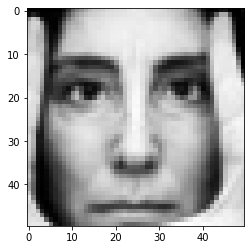

In [9]:

pick_in = open('data2.pickle','rb')
data2 = pickle.load(pick_in)
pick_in.close()

random.shuffle(data2)
features = []
labels =[]

for feature,label in data2:
    features.append(feature)
    labels.append(label)
xtrain, xtest,ytrain, ytest = train_test_split(features, labels, test_size= 0.25)

    
pick = open('model2.sav','rb')
model2=pickle.load(pick)
pick.close()

prediction = model2.predict(xtest)
accuracy = model2.score(xtest, ytest)
categories=['angry','disgust','fear','happy','neutral','sad','surprise']
print('accuracy:',accuracy)
print('Prediction is : ',categories[prediction[0]])

mypet = xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()